## Import and directories

In [1]:
#directories
import os
try:
    parentdir
except NameError:
    parentdir=os.getcwd()
else:
    parentdir = parentdir
homedir_A3_30sec=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160909_ZnAzuA655_Ferri_Asc/S82d9Sept16_0.11uW639nm_ZnAzu655_0.1mMAsc_0.2mMFerri_A3/30sec_trace';#data directory
homedir_A3_200sec=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160909_ZnAzuA655_Ferri_Asc/S82d9Sept16_0.11uW639nm_ZnAzu655_0.1mMAsc_0.2mMFerri_A3/200sec_trace';#data directory

print('The working directory is parentdir: %s' %parentdir)
print('The data directory is homedir: %s' %homedir_A3_30sec)
homedir_A4=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160909_ZnAzuA655_Ferri_Asc/S82d9Sept16_0.11uW639nm_ZnAzu655_0.1mMAsc_0.2mMFerri_A4'

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

The working directory is parentdir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis
The data directory is homedir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160909_ZnAzuA655_Ferri_Asc/S82d9Sept16_0.11uW639nm_ZnAzu655_0.1mMAsc_0.2mMFerri_A3/30sec_trace


In [2]:
#Run this once to run the .py file. Modules are also importted
os.chdir(parentdir)
!python Analysis_bis.py
%run Analysis_bis.py

### Figure Parameters

In [3]:
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "14"

## List of Points

### A3_30sec

In [4]:
point_list(foldername=homedir_A3_30sec)

,Point_1,Point_2,Point_3,Point_4,Point_5,Point_6,Point_7,Point_8,Point_9,Point_10,...,Point_17,Point_18,Point_19,Point_20,Point_22,Point_23,Point_24,Point_25,Point_27,Point_28
0,-100,-300,-100,-100,0,-100,-100,-300,-50,-200,...,-100,-100,-100,-100,-50,-100,-100,-100,-100,-50
1,-50,-200,0,-50,,-50,-50,-100,0,-100,...,-50,0,-50,0,0,-50,-50,0,-50,0
2,0,-100,,0,,0,0,0,50,0,...,0,50,0,50,50,0,0,,0,50
3,50,0,,50,,50,50,50,100,50,...,50,100,50,,100,50,50,,50,100
4,100,,,100,,100,100,100,,,...,100,,100,,200,100,100,,100,
5,200,,,200,,200,200,,,,...,200,,200,,,200,200,,200,
6,,,,,,,,,,,...,,,,,,,,,,
7,,,,,,,,,,,...,,,,,,,,,,


### A3_200sec

In [82]:
point_list(foldername=homedir_A3_200sec)

,Point_1,Point_4,Point_5,Point_6,Point_7,Point_12,Point_14,Point_17,Point_19,Point_22,Point_23,Point_24,Point_27
0,-200,-50,-50,-50,-50,-50,-50,-50,-50,-200,-50.0,-50,-200
1,-100,50,0,0,-50,0,0,,0,-50,-50.0,50,-200
2,-50,,50,50,-50,50,,,50,0,0.0,,-50
3,-50,,,,-50,,,,,25,0.0,,-50
4,-25,,,,,,,,,50,0.0,,0
5,0,,,,,,,,,,25.0,,25
6,50,,,,,,,,,,50.0,,
7,,,,,,,,,,,50.0,,


### A4

In [64]:
point_list(foldername=homedir_A4)

,Point_1,Point_2,Point_3,Point_4,Point_5,Point_6,Point_7,Point_8,Point_9,Point_10,Point_11,Point_12,Point_13,Point_14,Point_15,Point_16,Point_17,Point_18,Point_19,Point_20
0,-100,-200.0,-200,-100,-100,-200.0,-200.0,-200.0,0,-200.0,-100,-100,-100,-200.0,-200.0,-200,50,-200.0,-100,-200.0
1,-50,-100.0,-100,,-50,-100.0,-100.0,-100.0,50,-100.0,-50,-50,-50,-100.0,-100.0,-100,,-100.0,-50,-100.0
2,0,-50.0,-50,,0,-50.0,-50.0,-50.0,100,-50.0,0,0,0,-50.0,-50.0,-50,,-50.0,0,-50.0
3,50,0.0,0,,50,0.0,0.0,0.0,,0.0,50,50,50,0.0,0.0,0,,0.0,50,0.0
4,,50.0,,,,50.0,50.0,50.0,,50.0,,100,100,50.0,50.0,50,,50.0,100,50.0
5,,100.0,,,,100.0,100.0,100.0,,100.0,,,,100.0,100.0,,,100.0,,100.0


### Check missing files

In [84]:
check_missingFCSfiles(foldername=homedir_A4)

In [70]:
potentialist = linspace(-100, 200, 1+(200-(-100))/5);
def timetrace_outputs_folderwise(folderpath=foldername, pointnumbers=[1], potentialist=potentialist):
    df_datn_emplot, df_FCS, pt3_list = dir_mV_molNo(foldername=folderpath)
    df_datn_emplot = df_datn_emplot[df_datn_emplot['Point number'].isin(pointnumbers)]#keep all the points that exist
    df_datn_emplot = df_datn_emplot[df_datn_emplot['Potential'].isin(potentialist)]
    out_point = []#pd.DataFrame()
    out_total = pd.DataFrame()#initiating empty output matrix
    for input_number in pointnumbers:
        df_datnem_specific = df_datn_emplot[df_datn_emplot['Point number']==input_number]
        df_datnem_specific = df_datnem_specific.sort(['Potential'], ascending=[1])
        df_datnem_specific.reset_index(drop=True, inplace=True)

        if not df_datnem_specific.empty:
            #---------Create Pandas array to save outputs----------
            indices = np.ones(7); indices=indices.astype(str)
            Point_number = 'Point_'+str(input_number)
            indices[:]=Point_number
            group_1 = ['Potential']
            group_ind = np.ones(6);group_ind = group_ind.astype(str)
            group_2=group_ind.copy(); group_2[:]='t_ratio_timetrace'
            #group_3 = group_ind.copy(); group_3[:]='t_ratio_FCS'
            group=concatenate((group_1, group_2))
            subgroup_1 = ['Potential']
            subgroup_2 = ['t_onav', 't_onaverr', 't_offav','t_offaverr','t_ratio', 't_ratioerr']
            #subgroup_3 = subgroup_2;
            subgroup = concatenate((subgroup_1, subgroup_2))
            arrays = [indices, group, subgroup]
            col = pd.MultiIndex.from_arrays(arrays)
            length=(len(df_datnem_specific))#for defining dimension of out_mat
            out_point = pd.DataFrame(zeros((length, len(subgroup))), columns=col)#create zeroes which will be replaced by proper values

            #---------Pandas array created to save outputs----
            out_point[Point_number]['Potential']=df_datnem_specific['Potential']
            t_onav=[];t_onaverr=[]; t_offav=[]; t_offaverr=[]; t_ratio=[]; t_ratioerr=[] #Empty forms for timetrace output
            t_onavfcs=[];t_onaverrfcs=[]; t_offavfcs=[]; t_offaverrfcs=[]; t_ratiofcs=[]; t_ratioerrfcs=[] #Empty forms for timetrace output
            for i in range(length):
                potential = out_point[Point_number]['Potential']['Potential'][i]
                df_datnem_potential = df_datn_emplot[df_datn_emplot['Potential']==potential]
                df_datnem_potential.reset_index(drop=True, inplace=True);
                df_datn_path = df_datnem_potential['filepath[.datn]'][0]
                df_em_path = df_datnem_potential['filepath[.em.plot]'][0]

                df_ton, df_toff, average_ton, average_toff, average_ton_err, average_toff_err = t_on_off_fromCP(df_datn_path, df_em_path)
                ratio_on_off = average_ton/average_toff;
                ratio_on_off_err = (average_ton/average_toff)*sqrt(((average_ton_err/average_ton)**2)+((average_toff_err/average_toff)**2))

                t_onav.append(average_ton)
                t_onaverr.append(average_ton_err)#needs to be changed
                t_offav.append(average_toff)
                t_offaverr.append(average_toff_err)#needs to be changed
                t_ratio.append(ratio_on_off)
                t_ratioerr.append(ratio_on_off_err)#needs to be changed
            df_create=array([t_onav, t_onaverr, t_offav, t_offaverr, t_ratio, t_ratioerr])
            df_create=df_create.astype(float64)#;a=pd.DataFrame(a)
            df_create = pd.DataFrame(df_create.T, columns=['t_onav', 't_onaverr', 't_offav','t_offaverr','t_ratio', 't_ratioerr'])
            out_point[Point_number]['t_ratio_timetrace']=df_create
            out_total=pd.concat([out_total, out_point], axis=1);
    return(out_point)

In [55]:
def dir_mV_molNo_pt3(foldername=foldername):
    os.chdir(foldername)
    extensions_pt3 = [".pt3"] #file extensions we are interested in
    string_pt3 = '.pt3'
    string_mV = 'mV'
    columns = ['Point number', 'Potential', 'filename[pt3]', 'filepath[pt3]']
    pt3_list = pd.DataFrame(index=None, columns=columns)
    for dirpath, dirnames, filenames in os.walk("."):
        for filename in [f for f in filenames if f.endswith(tuple(extensions_pt3))]:
            position_num = filename.find(string_pt3)
            pos_num_val_1 = filename[position_num-1]
            pos_num_val_2 = filename[position_num-2]
            pos_num_val_3 = filename[position_num-3]
            if not pos_num_val_1.isdigit():
                print('Point number in %s is not properly placed(found): ' %filename)
                point_number = 1000
            elif pos_num_val_2 in ['_']:
                point_number = pos_num_val_1
            elif pos_num_val_3 in ['_']:
                point_number = pos_num_val_2 + pos_num_val_1
            point_number=int(point_number)
            #print(point_number)
            #potential extraction
            position_pot = filename.find(string_mV)
            pos_pot_val_1 = filename[position_pot-1]
            pos_pot_val_2 = filename[position_pot-2]
            pos_pot_val_3 = filename[position_pot-3]
            pos_pot_val_4 = filename[position_pot-4]
            pos_pot_val_5 = filename[position_pot-5]
            if not pos_num_val_1.isdigit():
                print('potential value in %s is not properly defined' %filename)
                potentail_val = 1000
            elif pos_pot_val_2 in ['_']:
                potentail_val = pos_pot_val_1
            elif pos_pot_val_3 in ['_']:
                potentail_val = pos_pot_val_2 + pos_pot_val_1
            elif pos_pot_val_4 in ['_']:
                potentail_val = pos_pot_val_3 + pos_pot_val_2 + pos_pot_val_1
            elif pos_pot_val_5 in ['_']:
                potentail_val = pos_pot_val_4 +pos_pot_val_3 + pos_pot_val_2 + pos_pot_val_1
            potentail_val = int(potentail_val)
            file_pt3 = filename;
            temp_pt3list = pd.DataFrame([[point_number, potentail_val, filename, foldername+'/'+dirpath+'/'+filename]], columns=columns)
            pt3_list = pt3_list.append(temp_pt3list, ignore_index = True)
    return(pt3_list)
def dir_mV_molNo(foldername=foldername):
    pt3_list = dir_mV_molNo_pt3(foldername=foldername)
    extensions = [".dat", ".datn"]
    columns_FCS = ['Point number', 'Potential', 'filename[FCS]', 'filepath[FCS]']
    FCS_list = pd.DataFrame(index=None, columns=columns_FCS)
    columns_datn_em=['Point number', 'Potential', 'filename[.datn]', 'filepath[.datn]','filename[.em.plot]', 'filepath[.em.plot]']
    datn_em_list = pd.DataFrame(index=None, columns=columns_datn_em)
    for i in range(len(pt3_list)):
        pt3_filename = pt3_list['filename[pt3]'][i]
        point_number = pt3_list['Point number'][i]
        point_number = int(point_number)
        potential = pt3_list['Potential'][i]
        potential = int(potential)
        pt3_path = pt3_list['filepath[pt3]'][i]
        for dirpath, dirnames, filenames in os.walk("."):
            for filename in [f for f in filenames if f.endswith(tuple(extensions))]:
                if pt3_filename[:-5] in filename and 'FCS' in filename and '_'+str(point_number)+'_' in filename:
                    temp_FCS_list = pd.DataFrame([[point_number, potential, filename, foldername+'/'+dirpath+'/'+filename]], columns=columns_FCS)
                    FCS_list = FCS_list.append(temp_FCS_list, ignore_index=True)
                if pt3_filename[:-3] in filename and 'datn' in filename:
                    filename_datn = filename
                    filename_emplot = filename+'.em.plot'
                    temp_datn_list = pd.DataFrame([[point_number, potential, filename_datn, foldername+'/'+dirpath+'/'+filename_datn,
                                                   filename_emplot, foldername+'/'+dirpath+'/'+filename_emplot]], columns=columns_datn_em)
                    datn_em_list = datn_em_list.append(temp_datn_list, ignore_index=True)
    pt3_list = pt3_list.sort(['Point number'], ascending=[1])
    FCS_list = FCS_list.sort(['Point number'], ascending=[1])
    datn_em_list = datn_em_list.sort(['Point number'], ascending=[1])
    return(datn_em_list, FCS_list, pt3_list)

In [34]:
foldername = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S104d21Feb17_60.5_635_A1_CuAzu655'
datn_em_list, FCS_list, pt3_list = dir_mV_molNo(foldername=foldername)


In [75]:
#CHECK if files are missinf
foldername = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160907_CuAzu655_Ferri_Asc_analysis'
def check_missingFCSfiles(foldername=foldername):
    datn_em_list, FCS_list, pt3_list = dir_mV_molNo(foldername=foldername)
    for i in range(len(datn_em_list)):
        file_name = datn_em_list['filename[.datn]'][i]
        point_number = datn_em_list['Point number'][i]
        potential = datn_em_list[l'Potential'][i]
        FCS = FCS_list[FCS_list['Point number'].isin([point_number])]
        FCS = FCS[FCS['Potential'].isin([potential])]
        if FCS.empty:
            print('FCS of %s with Point number %s with potential %s doesn''nt exist' %(file_name,point_number, potential) )
    return

## Timetrace plot

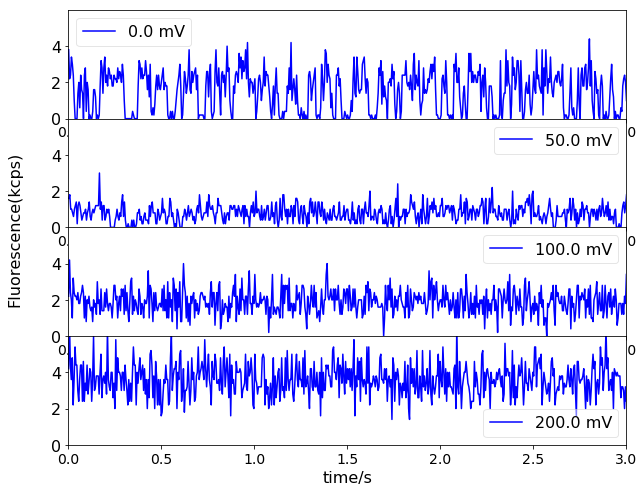

In [10]:
fig = time_trace_plot(foldername= homedir_A3_30sec, input_potential=[0, 50, 100, 200], pointnumbers=[6], x_lim_min=0, y_lim_min=0, x_lim_max=3, y_lim_max=6, bin=5, show_changepoint=False)

## FCS

### Aexp(-t/t_ac)

(22.006091577078397, 76.489990513246482, 0.28769897119110505)

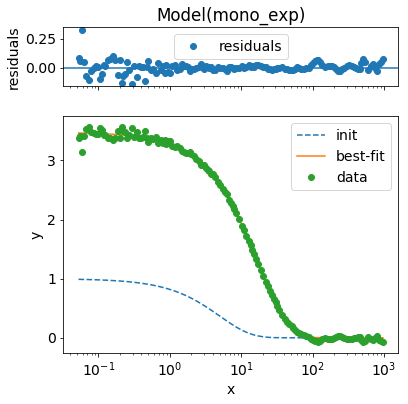

In [42]:
df_datn_em_specific, df_fcs_specific = get_point_specifics(foldername= homedir_A3_200sec, input_potential=[-50], pointnumbers=[23])
df_fcs=df_fcs_specific['filepath[FCS]'][0]
df_emplot = df_datn_em_specific['filepath[.em.plot]'][0]
df_datn = df_datn_em_specific['filepath[.datn]'][0]
def FCS_mono_fit(df_fcs,df_emplot, tmin=0.05,tmax=1000):
    df_fcs = pd.read_csv(df_fcs, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
    df_fcs = df_fcs[df_fcs[0]>=tmin];
    df_fcs = df_fcs[df_fcs[0]<=tmax];
    xdata=df_fcs[0];
    ydata=df_fcs[1];
    df_em = pd.read_csv(df_emplot, header=None, sep='\t')#changepoint
    S=max(df_em[1]);
    Bkr=min(df_em[1]);
    correction_BG = (S/(S+Bkr))**2
    #ydata= ((ydata)/correction_BG)
    def mono_exp(x, A, t_ac, t_rise):
        return A*exp(-x/t_ac)
    gmodel = Model(mono_exp)
    gmodel.set_param_hint('A', value=1, min=0.05, max=100)
    gmodel.set_param_hint('t_ac', value=5, min=1, max=100)
    gmodel.set_param_hint('t_rise', value=5, min=1, max=100)
    pars = gmodel.make_params()
    result = gmodel.fit(ydata, pars, x=xdata)#, A=1, B=1, t_ac=1
    A = result.best_values['A']
    t_ac = result.best_values['t_ac']
    toff = t_ac*(1+A); ton = t_ac*(1+(1/A));
    tratio_on_off = ton/toff
    return(ton, toff, tratio_on_off, result)#, t_on_err, t_off_err
ton, toff, tratio_on_off, result = FCS_mono_fit(df_fcs, df_emplot)
result.plot()
xscale('log')
ton, toff, tratio_on_off

(23.75, 122.81, 0.19338816057324321)

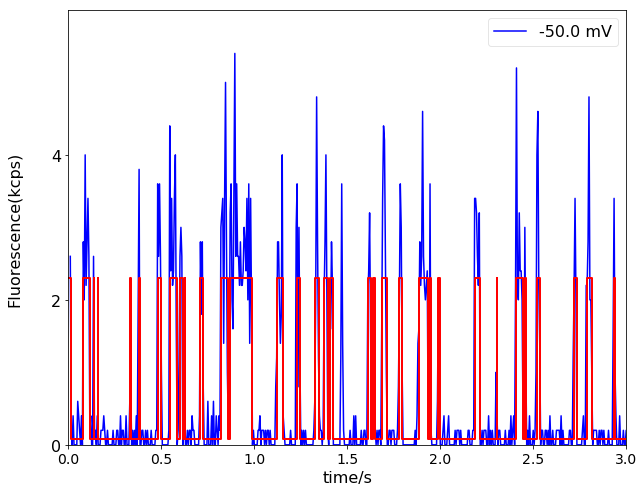

In [43]:
fig = time_trace_plot(foldername= homedir_A3_200sec, input_potential=[-50], pointnumbers=[23],
                      x_lim_min=0, y_lim_min=0, x_lim_max=3, y_lim_max=6, bin=5, show_changepoint=True)
df_ton, df_toff, average_ton, average_toff, average_ton_err, average_toff_err = t_on_off_fromCP(df_datn, df_emplot)
average_ton, average_toff, average_ton/average_toff

## Histogram_on_off

In [29]:
def histogram_on_off_all_folder(allfolders, input_potential=[100], pointnumbers=range(100),
                          bins_on=50, range_on=[0, 0.2], bins_off=50, range_off=[0, 0.5], plotting=False):
    t_ons = []; t_offs = [];
    for folder in allfolders:
        df_datn_emplot, df_FCS, folder = dir_mV_molNo(folder)
        df_specific = df_datn_emplot[df_datn_emplot['Point number'].isin(pointnumbers)]#keep all the points that exist
        df_specific = df_specific[df_specific['Potential'].isin(input_potential)]; df_specific.reset_index(drop=True, inplace=True)
        for i in range(len(df_specific)):
            Point_number = df_specific['Point number'][i]
            f_datn_path = df_specific['filepath[.datn]'].values[i]
            f_emplot_path = df_specific['filepath[.em.plot]'].values[i]
            df_emplot_filename = df_specific['filename[.em.plot]'][i]
            if os.path.isfile(f_emplot_path):
                try:
                    df_ton, df_toff, average_ton, average_toff, average_ton_err, average_toff_err = t_on_off_fromCP(f_datn_path, f_emplot_path)
                except:
                    print('em.plot file: %s doesn''t contain proper data' %df_emplot_filename)
                    df_ton=[]; df_toff=[]
                    pass
            else:
                print('em.plot file of %s with potential %s doesn''t exist' %(Point_number, input_potential))
                df_ton=[]; df_toff=[]
            t_ons = np.concatenate((t_ons, df_ton), axis=0);
            t_offs = np.concatenate((t_offs, df_toff));
    if plotting == True:
        fig, axes = plt.subplots(1, 2, figsize=(20,8))
        n,bins_on,patches = axes[0].hist(t_ons, range=range_on,bins=bins_on)
        axes[0].set_xlabel(r'$\tau_{on}$')
        axes[0].set_ylabel('#')
        #axes[0].set_yscale('log')
        axes[0].set_title("ON time histogram at %s mV" %input_potential[0])
        n,bins_off,patches = axes[1].hist(t_offs, range=range_off,bins=bins_off)
        axes[1].set_xlabel(r'$\tau_{off}$')
        axes[1].set_ylabel('#')
        #axes[1].set_yscale('log')
        axes[1].set_title("OFF time histogram at %s mV" %input_potential[0])
    return(t_ons, t_offs)

### 0 mV

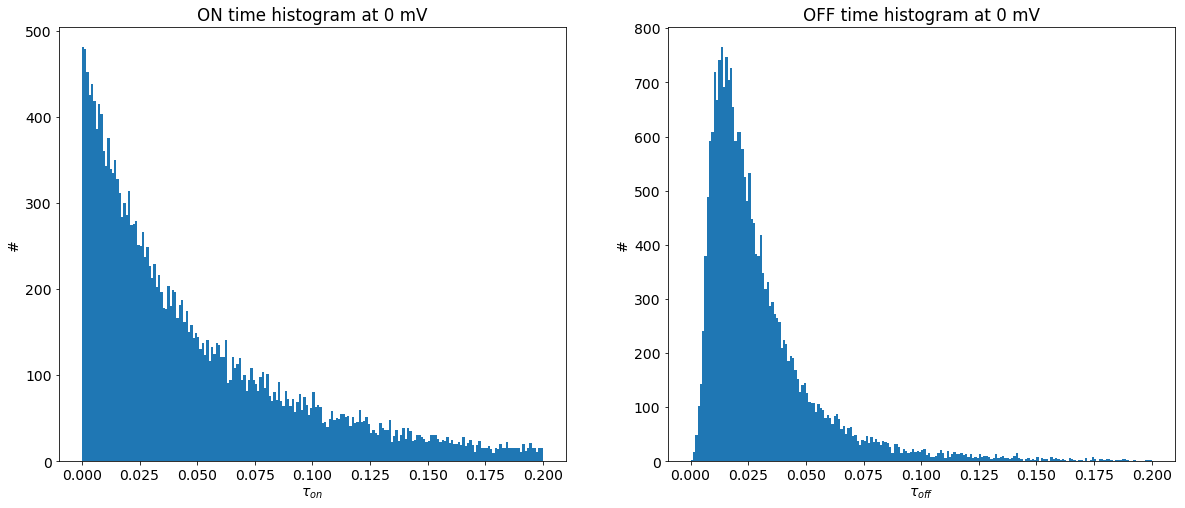

In [32]:
dira = [r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160909_ZnAzuA655_Ferri_Asc']
t_ons, t_offs = histogram_on_off_all_folder(allfolders= dira, input_potential=[0], pointnumbers=range(100), 
                                        bins_on=200, range_on=[0, 0.2], bins_off=200, range_off=[0, 0.2], plotting=True)

### 25 mV

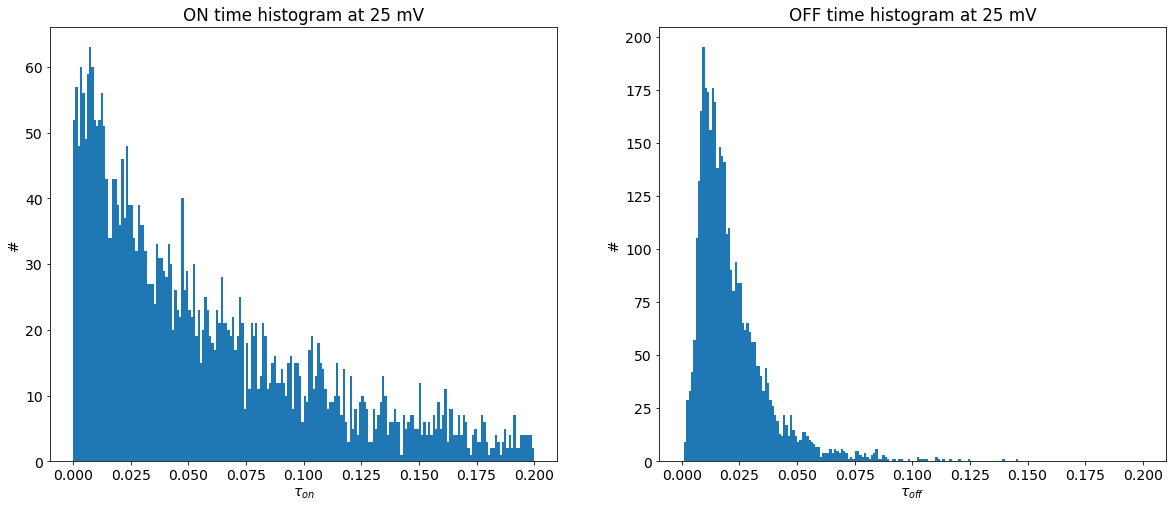

In [33]:
dira = [r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160909_ZnAzuA655_Ferri_Asc']
t_ons, t_offs = histogram_on_off_all_folder(allfolders= dira, input_potential=[25], pointnumbers=range(100), 
                                        bins_on=200, range_on=[0, 0.2], bins_off=200, range_off=[0, 0.2], plotting=True)

### -50 mV

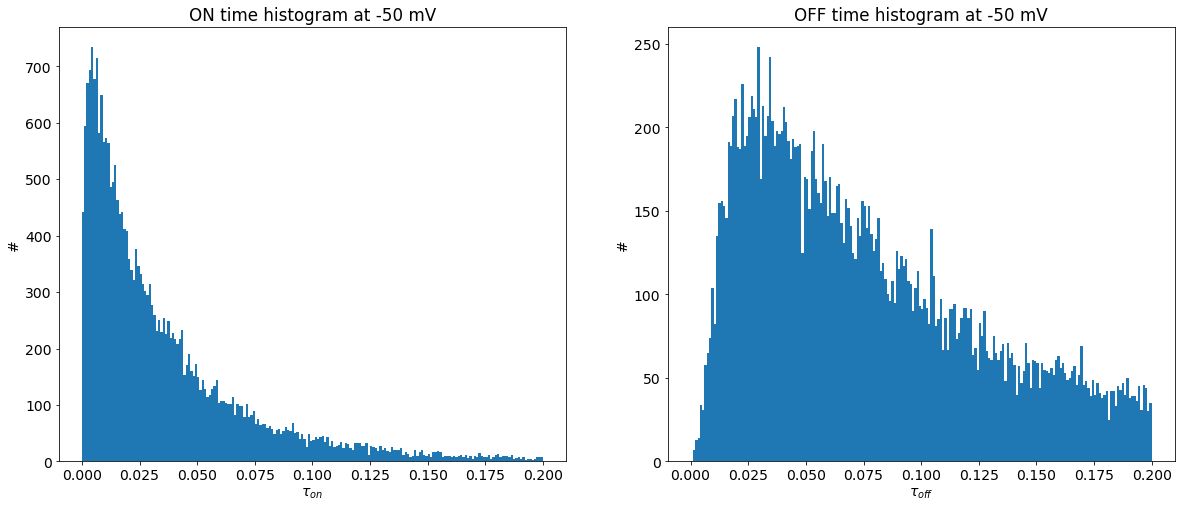

In [34]:
dira = [r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160909_ZnAzuA655_Ferri_Asc']
t_ons, t_offs = histogram_on_off_all_folder(allfolders= dira, input_potential=[-50], pointnumbers=range(100), 
                                        bins_on=200, range_on=[0, 0.2], bins_off=200, range_off=[0, 0.2], plotting=True)

### -100 mV

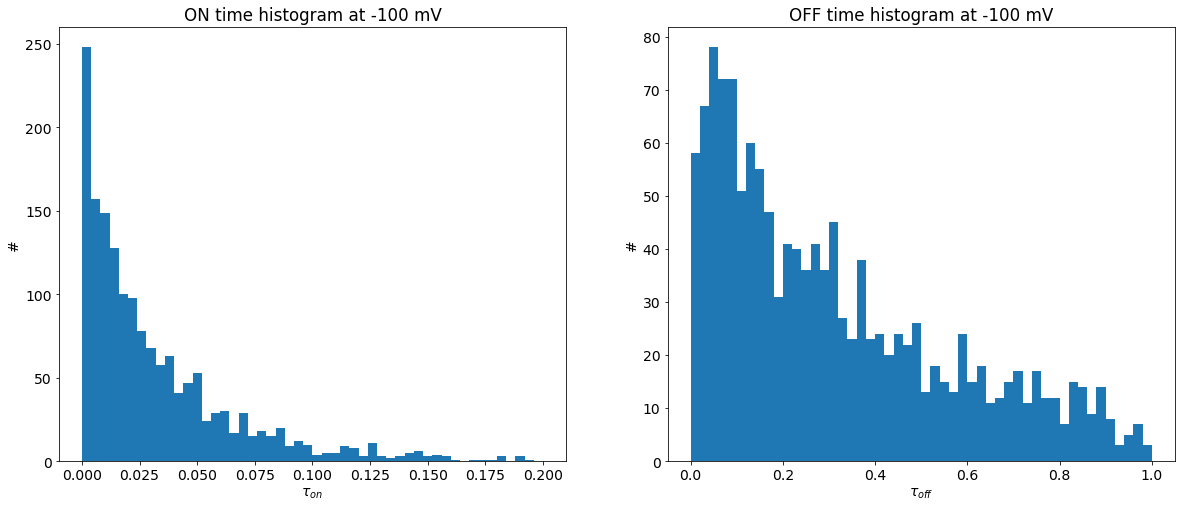

In [37]:
dira = [r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160909_ZnAzuA655_Ferri_Asc']
t_ons, t_offs = histogram_on_off_all_folder(allfolders= dira, input_potential=[-100], pointnumbers=range(100), 
                                        bins_on=50, range_on=[0, 0.2], bins_off=50, range_off=[0, 1], plotting=True)